# Multiple linear regression

Let's now investigate **multiple linear regression** (MLR), where several output depends on more than one input variable:

$$
\begin{cases}
y_1 = w_1 \, x_1 + w_2 \, x_2 + b_1\\
\\
y_2 = w_3 \, x_1 + w_4 \, x_2 + b_2\\
\end{cases}
$$

The California Housing Dataset consists of price of houses in various places in California. Alongside with the price of over 20000 houses, the dataset provides 8 features:

- `MedInc`       : median income in block group
- `HouseAge`     : median house age in block group
- `AveRooms`     : average number of rooms per household
- `AveBedrms`    : average number of bedrooms per household
- `Population`   : block group population
- `AveOccup`     : average number of household members
- `Latitude`     : block group latitude
- `Longitude`    : block group longitude

The California housing dataset can be directly downloaded from scikit-learn:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

X = dataset.data
t = dataset.target

print(X.shape)
print(t.shape)

(20640, 8)
(20640,)


There are 20640 samples with 8 input features and one output (the price). The following cell decribes the dataset:

In [2]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The following cell allows to visualize how each feature influences the price individually:

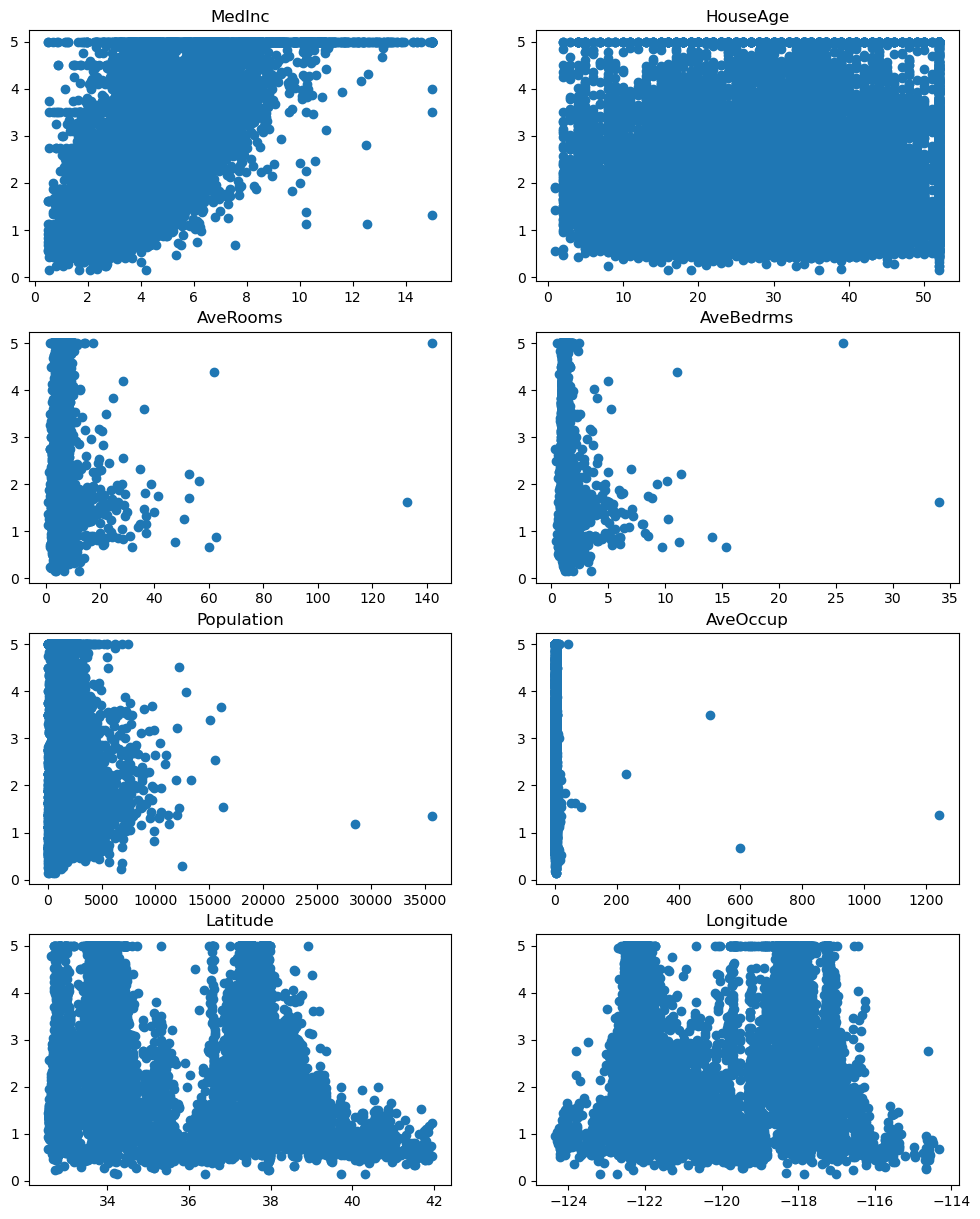

In [3]:
plt.figure(figsize=(12, 15))

for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X[:, i], t)
    plt.title(dataset.feature_names[i])
plt.show()

## Linear regression

**Q:** Apply MLR on the California data using the same `LinearRegression` method of `scikit-learn` as last time. Print the mse, plot how the predictions predict the price for each feature,  and plot the prediction $y$ against the true value $t$ for each sample as in the last exercise. Does it work well?

You will also plot the weights of the model (`reg.coef_`) and conclude on the relative importance of the different features: which feature has the stronger weight and why?

MSE: 0.5243209861846072


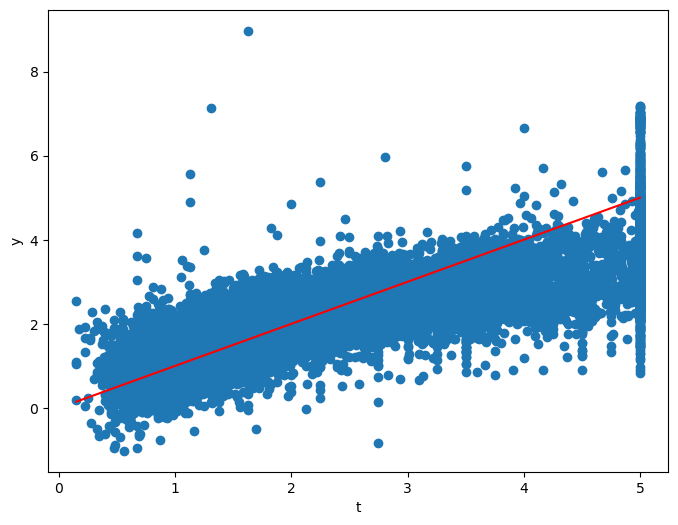

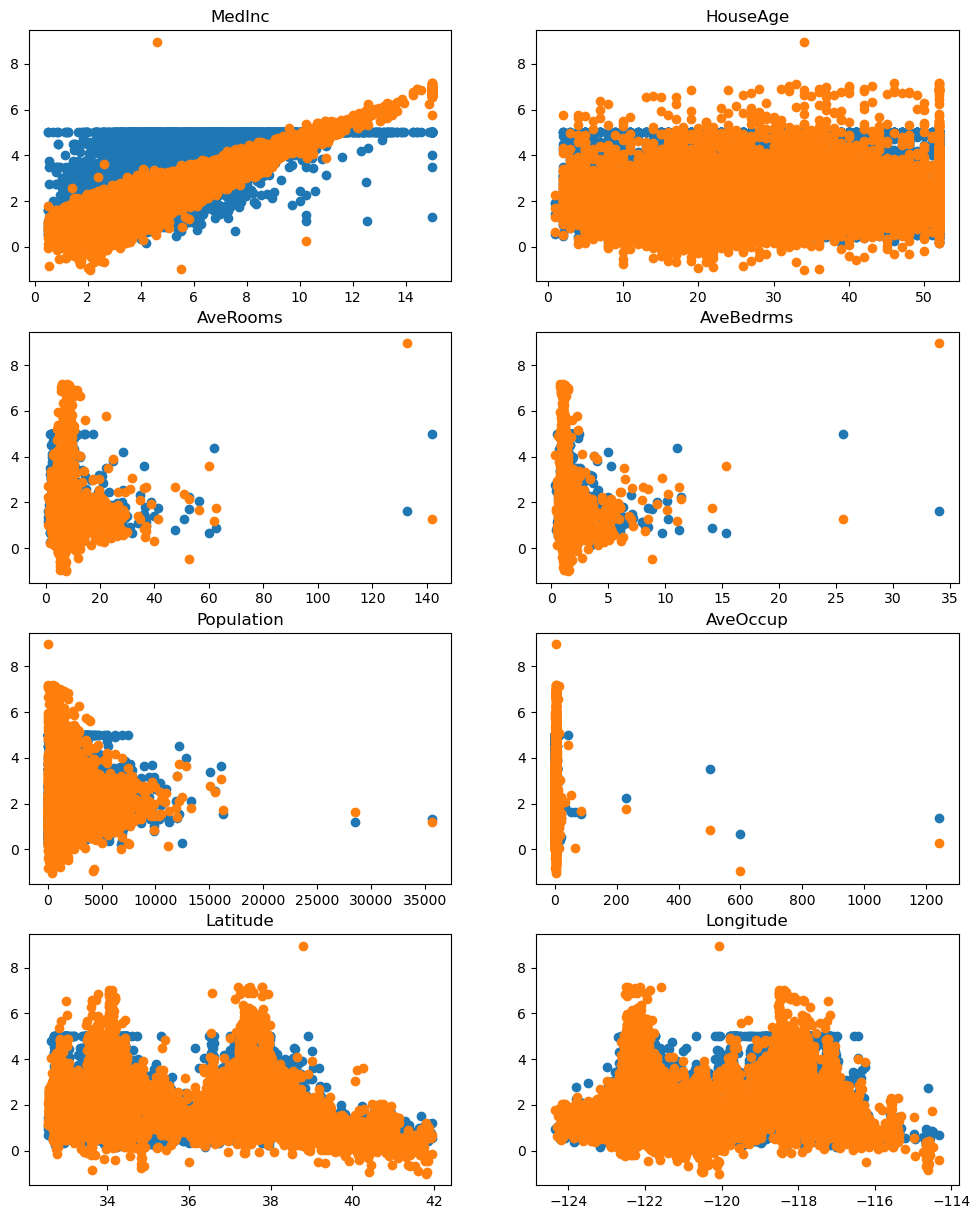

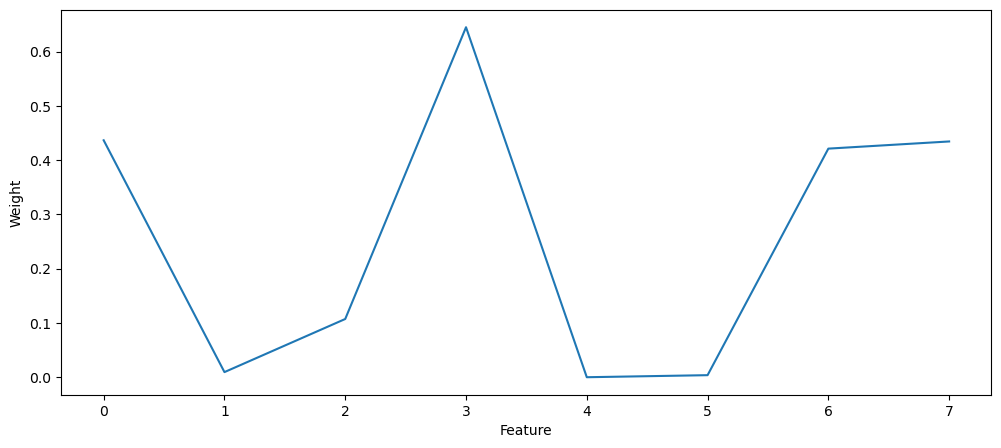

In [4]:
from sklearn.linear_model import LinearRegression

# Linear regression
reg = LinearRegression()
reg.fit(X, t)

# Prediction
y = reg.predict(X)

# mse
mse = np.mean((t - y)**2)
print("MSE:", mse)

plt.figure(figsize=(8, 6))
plt.scatter(t, y)
plt.plot([t.min(), t.max()], [t.min(), t.max()], c="red")
plt.xlabel("t")
plt.ylabel("y")

plt.figure(figsize=(12, 15))
for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X[:, i], t)
    plt.scatter(X[:, i], y)
    plt.title(dataset.feature_names[i])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(np.abs(reg.coef_))
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

**A:** Feature 3 (AveBedrms, average number of bedrooms per household) got a very strong weight, although it is not a very good predictor of the price. The main reason is that the features are not **normalized**: AveBedrms varies between 0 an 135, while population varies between 0 and 35000. The weight on population does not need to be very high to influence the price prediction, although it might be very important.

A good practice in machine learning is to **normalize** the inputs, i.e. to make sure that the features have a mean of 0 and a standard deviation of 1. The formula is:

$$X^\text{normalized} = \dfrac{X - \mathbb{E}[X]}{\text{std}(X)}$$

i.e. you compute the mean and standard deviation of each column of `X` and apply the formula on each column. 

**Q:** Normalize the dataset. Make sure that the new mean and std is correct. 

*Tip:* `X.mean(axis=0)` and `X.std(axis=0)` should be useful.

In [5]:
X_normalized = (X - X.mean(axis=0))/X.std(axis=0)

print("Old mean:", X.mean(axis=0))
print("New mean:", X_normalized.mean(axis=0))
print("Old std:", X.std(axis=0))
print("New std:", X_normalized.std(axis=0))

Old mean: [ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02]
New mean: [ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
Old std: [1.89977569e+00 1.25852527e+01 2.47411320e+00 4.73899376e-01
 1.13243469e+03 1.03857980e+01 2.13590065e+00 2.00348319e+00]
New std: [1. 1. 1. 1. 1. 1. 1. 1.]


**Q:** Apply MLR again on $X^\text{normalized}$, print the mse and visualize the weights. What has changed?

mse: 0.5243209861846072


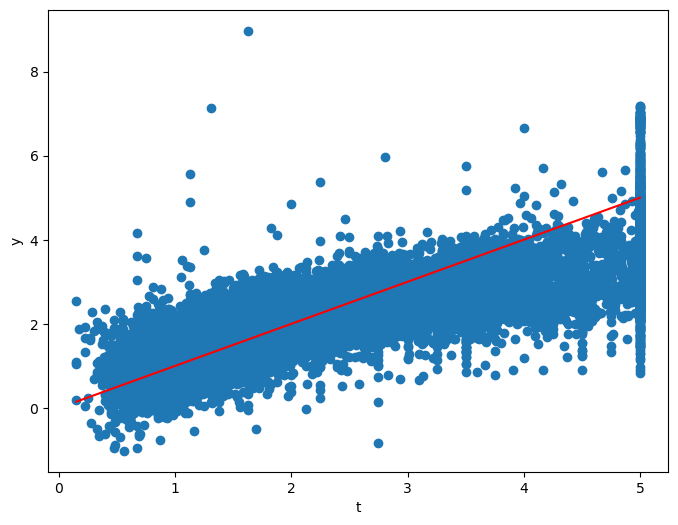

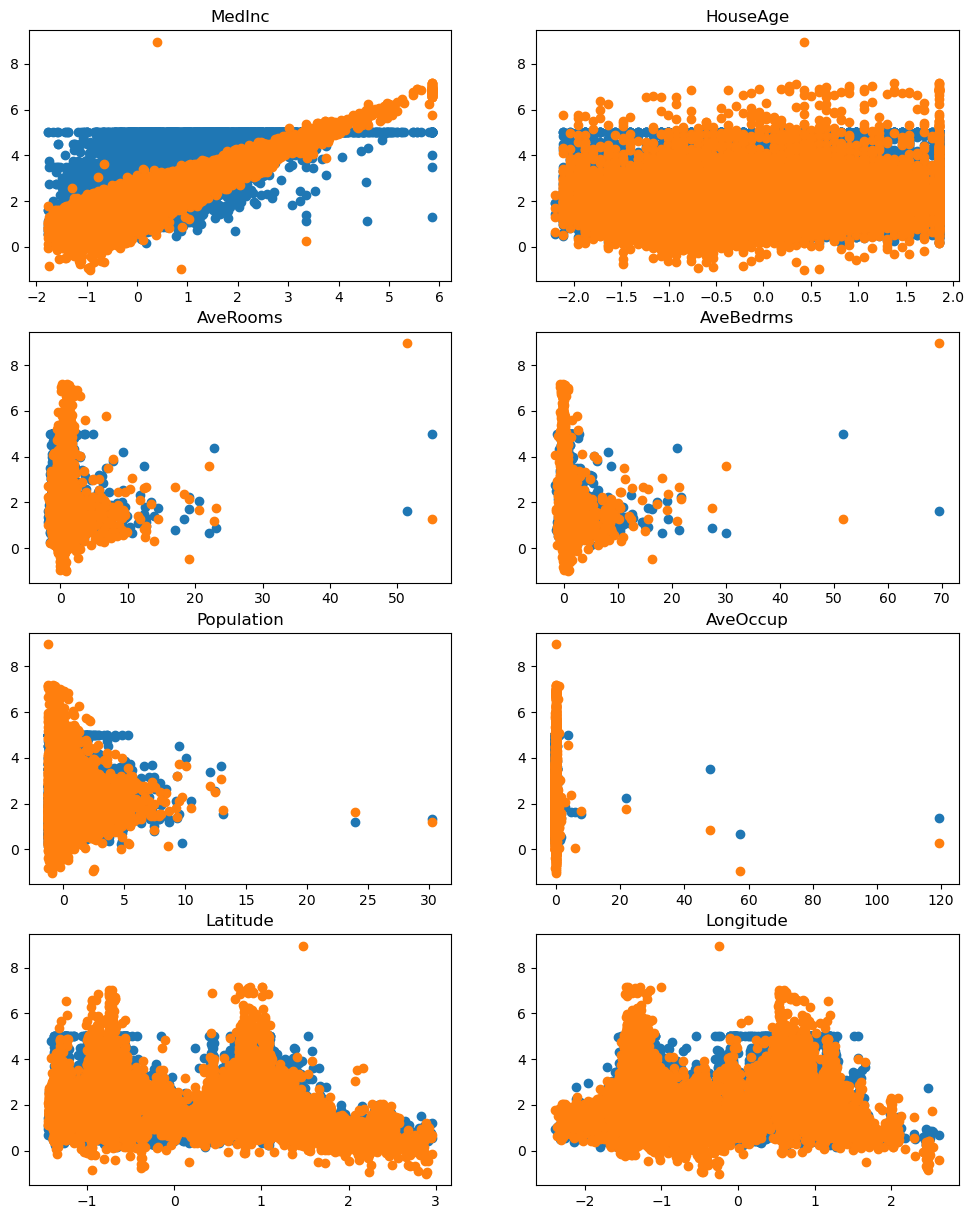

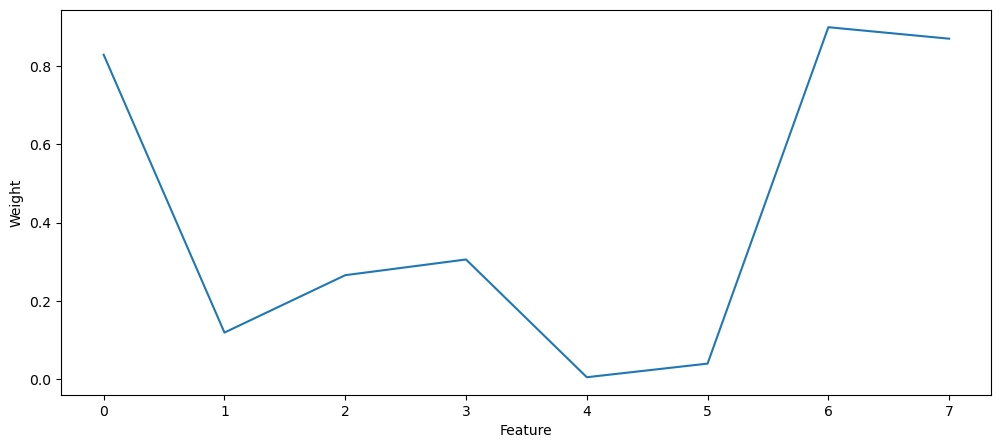

In [6]:
# Linear regression
reg = LinearRegression()
reg.fit(X_normalized, t)

# Prediction
y = reg.predict(X_normalized)

# mse
mse = np.mean((t - y)**2)
print("mse:", mse)

plt.figure(figsize=(8, 6))
plt.scatter(t, y)
plt.plot([t.min(), t.max()], [t.min(), t.max()], c="red")
plt.xlabel("t")
plt.ylabel("y")

plt.figure(figsize=(12, 15))
for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X_normalized[:, i], t)
    plt.scatter(X_normalized[:, i], y)
    plt.title(dataset.feature_names[i])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(np.abs(reg.coef_))
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

**A:** The mse does not change (it may in more complex problems), but the weights are more interpretable. Now strong weights in absolute value mean that the features are very predictive of the price. In particular, the feature populations 

## Regularized regression

Now is time to investigate **regularization**:
1. MLR with L2 regularization is called **Ridge regression**
2. MLR with L1 regularization is called **Lasso regression** 

Fortunately, `scikit-learn` provides these methods with a similar interface to `LinearRegression`. The `Ridge` and `Lasso` objects take an additional argument `alpha` which represents the regularization parameter:

```python
reg = Ridge(alpha=1.0)
reg = Lasso(alpha=1.0)
```

In [7]:
from sklearn.linear_model import Ridge, Lasso

**Q:** Apply Ridge and Lasso regression on the scaled data, vary the regularization parameter to understand its function and comment on the results. In particular, vary the regularization parameter for LASSO and identify the features which are the most predictive of the price. Does it make sense?  

0.5243267377872187
[ 0.8293461   0.11939823 -0.26422311  0.30398067 -0.00427544 -0.03936068
 -0.8937389  -0.86433656]


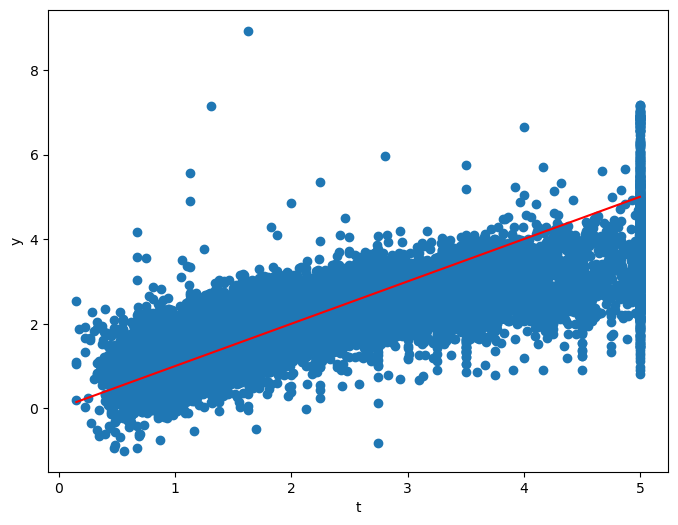

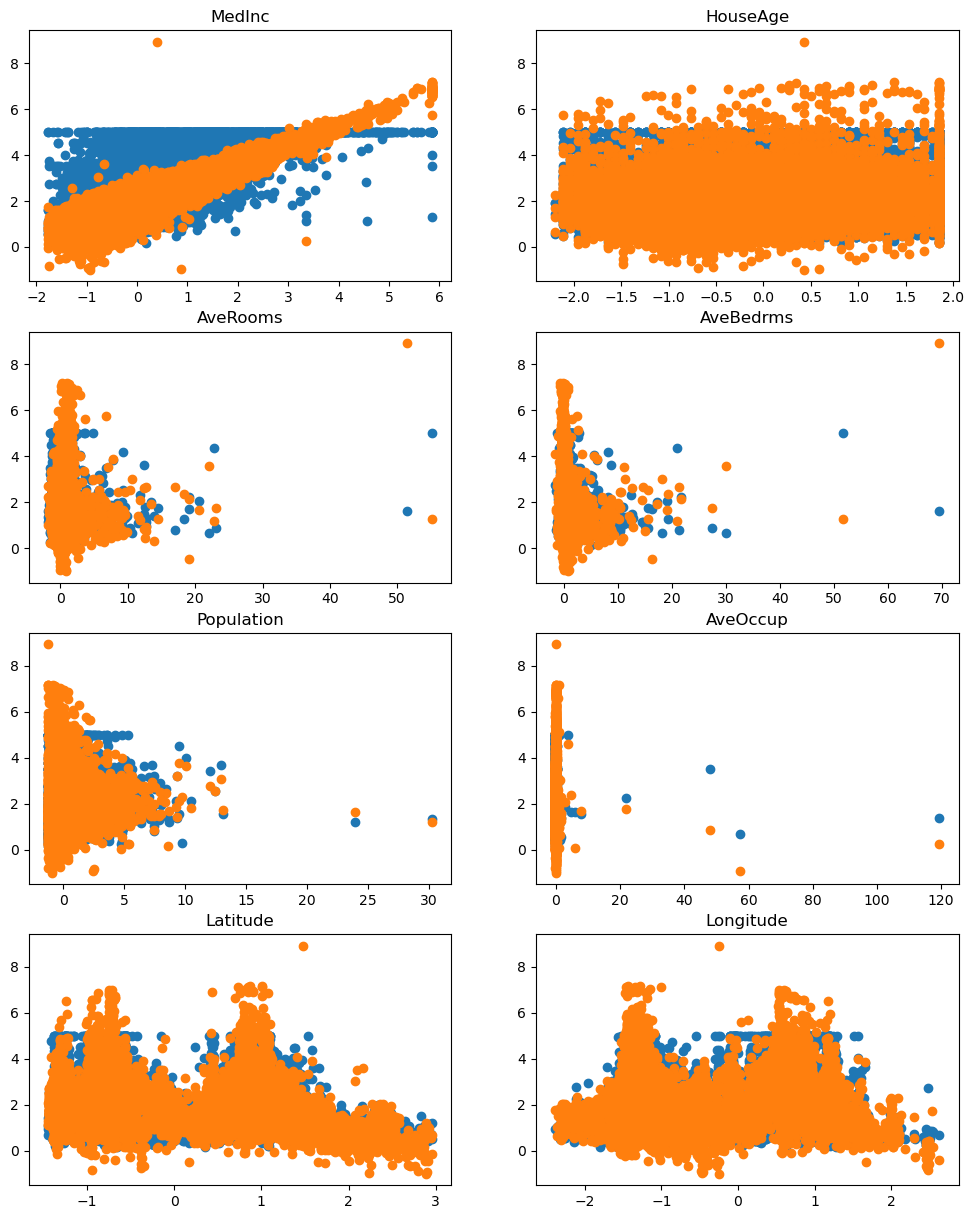

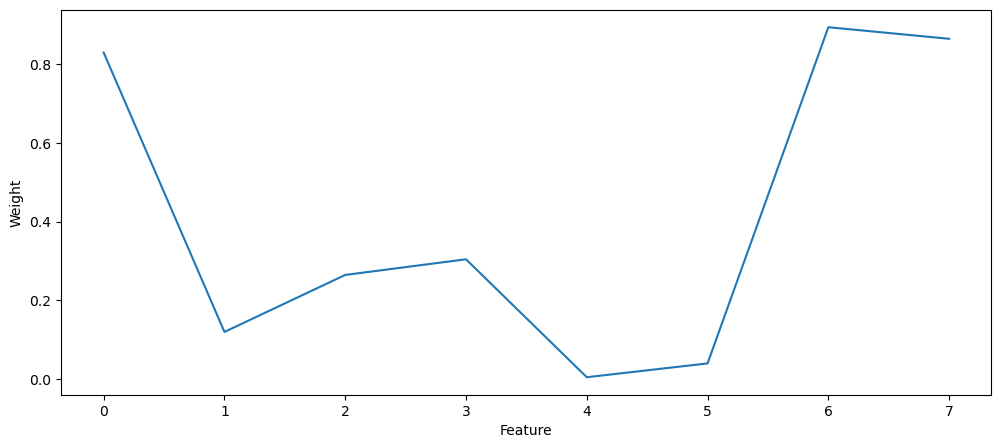

In [8]:
reg = Ridge(alpha=10.0)

reg.fit(X_normalized, t)
y = reg.predict(X_normalized)
mse = np.mean((t - y)**2)
print(mse)

print(reg.coef_)

plt.figure(figsize=(8, 6))
plt.scatter(t, y)
plt.plot([t.min(), t.max()], [t.min(), t.max()], c="red")
plt.xlabel("t")
plt.ylabel("y")

plt.figure(figsize=(12, 15))
for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X_normalized[:, i], t)
    plt.scatter(X_normalized[:, i], y)
    plt.title(dataset.feature_names[i])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(np.abs(reg.coef_))
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

0.6741415809786988
[ 0.70571337  0.10601099 -0.         -0.         -0.         -0.
 -0.01121267 -0.        ]


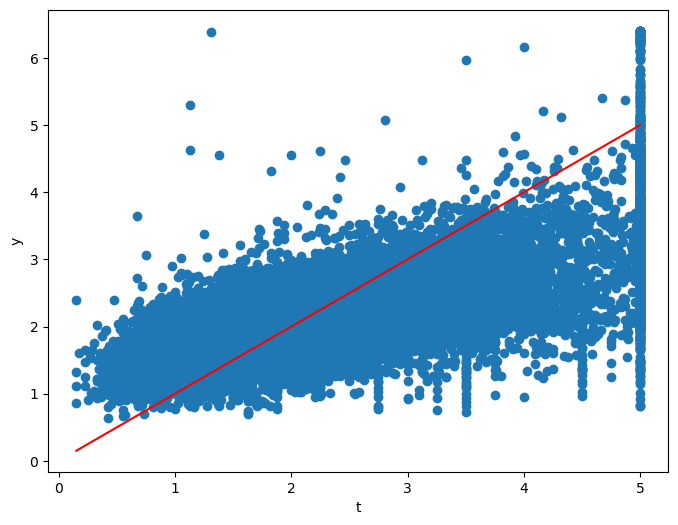

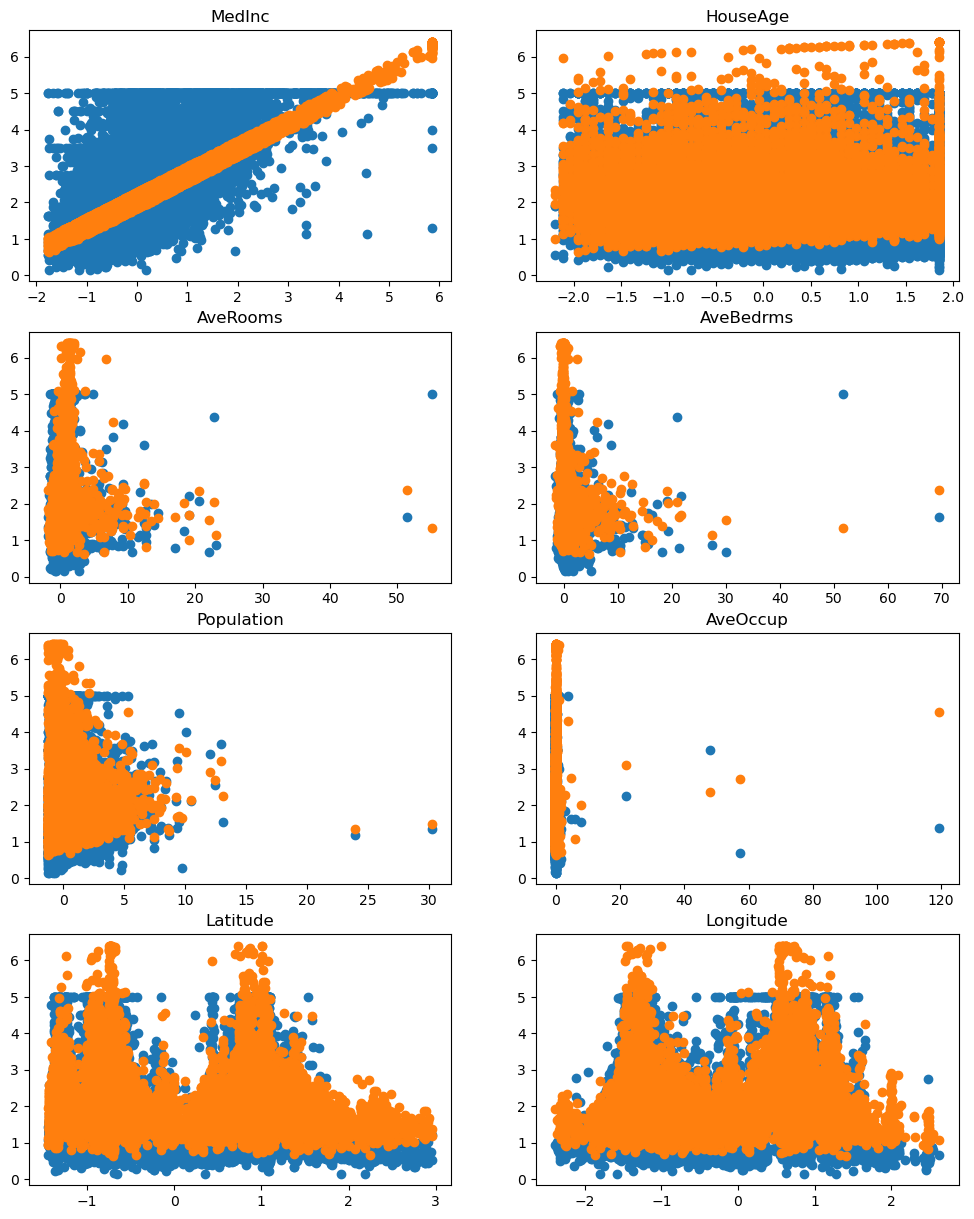

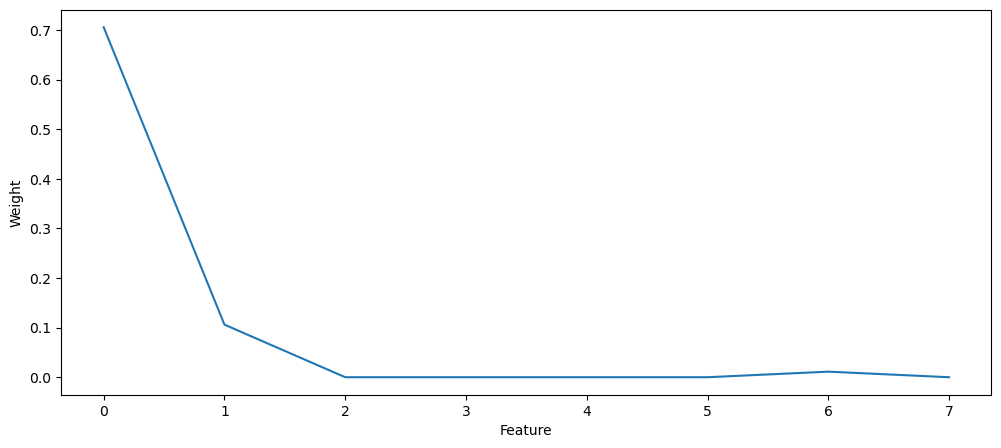

In [9]:
reg = Lasso(alpha=0.1)

reg.fit(X_normalized, t)
y = reg.predict(X_normalized)
mse = np.mean((t - y)**2)
print(mse)

print(reg.coef_)

plt.figure(figsize=(8, 6))
plt.scatter(t, y)
plt.plot([t.min(), t.max()], [t.min(), t.max()], c="red")
plt.xlabel("t")
plt.ylabel("y")

plt.figure(figsize=(12, 15))
for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X_normalized[:, i], t)
    plt.scatter(X_normalized[:, i], y)
    plt.title(dataset.feature_names[i])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(np.abs(reg.coef_))
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

**A:** Ridge regression does not have a big effect for this data. By increasing the regularization parameter in Lasso regression, the MSE worsens slightly, but the number of non-zero weights becomes very small. With `alpha=1.0`, all weights are set to 0... 
With `alpha=0.1`, there are only 3 non-zero parameters: the corresponding features are the most predictive of the prices. You can identify them with:

In [10]:
for i, w in enumerate(reg.coef_):
    if w != 0.0:
        print(dataset.feature_names[i], w)

MedInc 0.705713372959335
HouseAge 0.10601099216033393
Latitude -0.011212667061584703
